### Server Summarizing Prompts

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from matplotlib.colors import LinearSegmentedColormap
import os
import torch

# # Number of rounds and the number of embeddings per round
# rounds = 10
# embeddings_per_round = 5
# embedding_dim = 50

# # Step 1: Generate random embeddings for each round (5 embeddings per round, each with 50 dimensions)
# data = np.random.rand(rounds, embeddings_per_round, embedding_dim)

In [2]:
data_path = "../output_1211/L2P_Prob_only_global/test"
data = []

# Collect data with round number
for file in os.listdir(data_path):
    file_path = os.path.join(data_path, file)
    round_num = int(file.split("_")[-1].split(".")[0])
    if file.startswith("summarizing_prompts"):
        data_round = torch.load(file_path)
        data_round = data_round.reshape(data_round.shape[0], -1)
        print(data_round.shape, round_num)
        data.append((round_num, np.array(data_round)))
# print(data)

# Sort data by round number in ascending order
data.sort(key=lambda x: x[0])

# Extract only data arrays after sorting
data = [item[1] for item in data]


torch.Size([287, 3840]) 150
torch.Size([287, 3840]) 225
torch.Size([287, 3840]) 75
torch.Size([287, 3840]) 100
torch.Size([287, 3840]) 250
torch.Size([287, 3840]) 200
torch.Size([287, 3840]) 125
torch.Size([287, 3840]) 25
torch.Size([287, 3840]) 50
torch.Size([287, 3840]) 2
torch.Size([287, 3840]) 175


In [3]:
# data[0].shape
# data = data[:3]

In [4]:
centroids = [np.mean(round_embeddings, axis=0) for round_embeddings in data]

# Convert centroids to a 2D NumPy array
centroids = np.vstack(centroids)
centroids.shape

(11, 3840)

/tmp/ipykernel_1793096/2583136697.py:48: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(plt.cm.ScalarMappable(cmap=cmap), ticks=[0, 2, 4, 6, 8, 9])


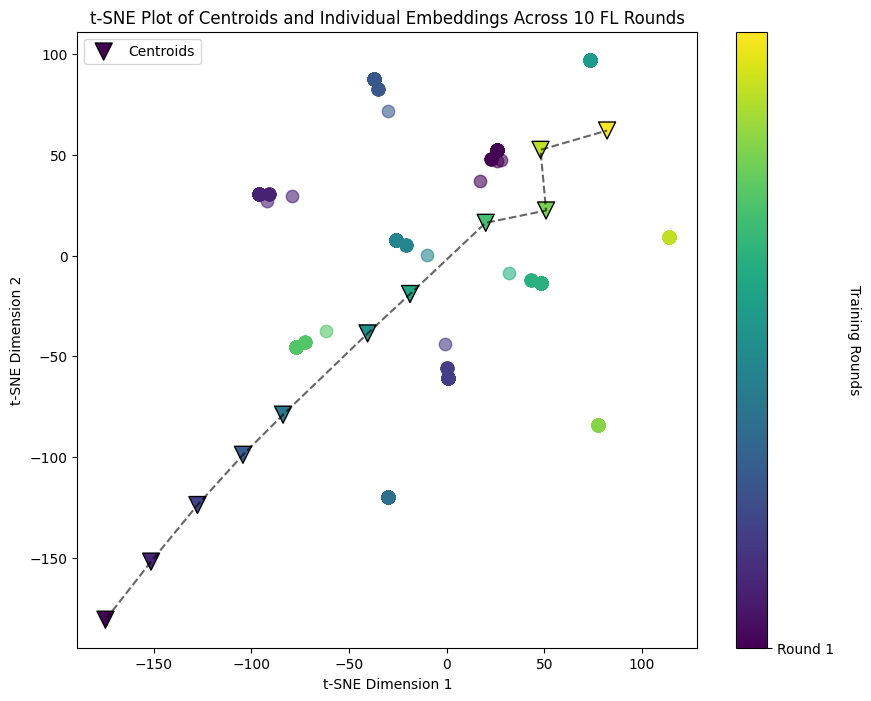

In [5]:
# Number of rounds
rounds = len(data)

# Step 1: Compute centroids (mean of embeddings for each round)
centroids = [np.mean(round_embeddings, axis=0) for round_embeddings in data]

# Convert centroids to a 2D NumPy array
centroids = np.vstack(centroids)

# Step 2: Apply t-SNE to reduce dimensionality to 2D for visualization (on centroids)
tsne = TSNE(n_components=2, random_state=0, perplexity=3)
# tsne = TSNE(n_components=2)

tsne_result = tsne.fit_transform(centroids)

# Step 3: Apply t-SNE to the individual embeddings for each round
# First, flatten the data into a single array for t-SNE
individual_embeddings = np.vstack(data)  # Combine all rounds' embeddings into a single array

# Apply t-SNE to the individual embeddings
tsne_individual = tsne.fit_transform(individual_embeddings)

# Step 4: Use a "viridis" colormap for better visibility of round progression
cmap = plt.cm.viridis  # "viridis" is a perceptually uniform colormap

# Step 5: Plotting the t-SNE result for centroids and individual embeddings
plt.figure(figsize=(10, 8))

# Plot centroids of each round with triangular markers ('v')
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=range(rounds), cmap=cmap, s=150, edgecolors='black', marker='v', label='Centroids')

# Add line connecting the centroids to show trajectory
plt.plot(tsne_result[:, 0], tsne_result[:, 1], c='black', linestyle='--', alpha=0.6)

# Plot individual embeddings for each round
start_idx = 0
for i in range(rounds):
    end_idx = start_idx + len(data[i])  # Get the end index for the current round's embeddings
    round_embeddings_tsne = tsne_individual[start_idx:end_idx]
    
    # Plot the individual embeddings, semi-transparent
    plt.scatter(round_embeddings_tsne[:, 0], round_embeddings_tsne[:, 1], c=[cmap(i / rounds)], s=80, alpha=0.6)

    # Update start index for the next round's embeddings
    start_idx = end_idx

# Step 6: Add a colorbar to represent the rounds
cbar = plt.colorbar(plt.cm.ScalarMappable(cmap=cmap), ticks=[0, 2, 4, 6, 8, 9])
cbar.set_ticklabels(['Round 1', 'Round 2', 'Round 3', 'Round 4', 'Round 5', 'Round 10'])
cbar.set_label('Training Rounds', rotation=270, labelpad=20)

# Step 7: Label the plot
plt.title("t-SNE Plot of Centroids and Individual Embeddings Across 10 FL Rounds")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")

# Step 8: Display the plot
plt.legend()
plt.show()

/tmp/ipykernel_1793096/366223624.py:49: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(plt.cm.ScalarMappable(cmap=cmap), ticks=[0, 2, 4, 6, 8, 9])


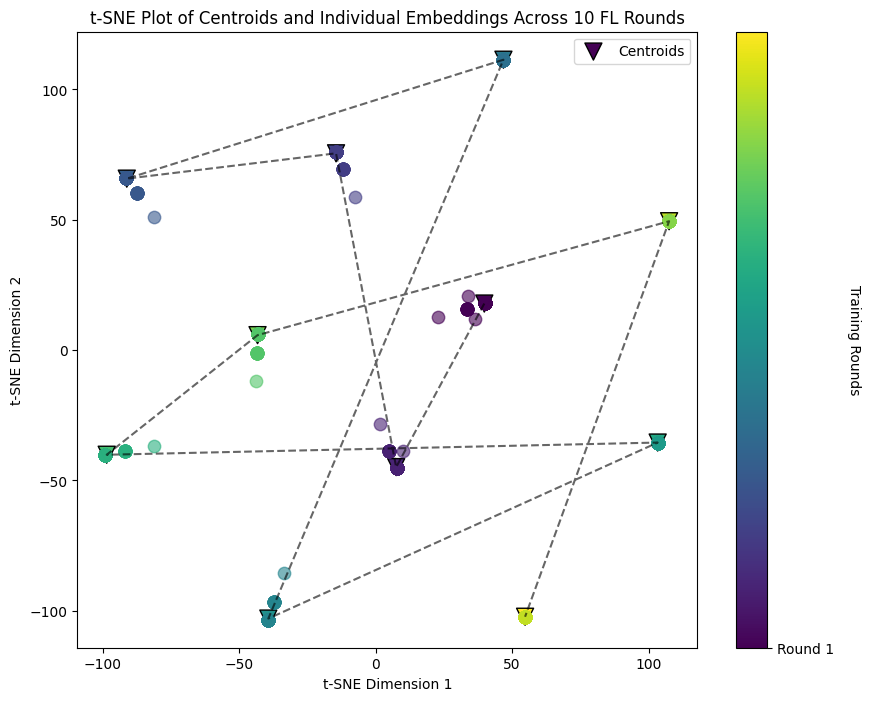

In [6]:

rounds = len(data)

# Flatten data into a single array for t-SNE
individual_embeddings = np.vstack(data)  # Combine all rounds' embeddings into a single array

# Step 1: Apply t-SNE to reduce dimensionality for all individual embeddings
tsne = TSNE(n_components=2, random_state=0, perplexity=5)
tsne_individual = tsne.fit_transform(individual_embeddings)

# Step 2: Compute the t-SNE centroids for each round based on transformed individual embeddings
start_idx = 0
tsne_centroids = []

for i in range(rounds):
    end_idx = start_idx + len(data[i])
    round_embeddings_tsne = tsne_individual[start_idx:end_idx]
    
    # Calculate the centroid for this round in the transformed space
    round_centroid_tsne = np.mean(round_embeddings_tsne, axis=0)
    tsne_centroids.append(round_centroid_tsne)
    
    start_idx = end_idx

# Convert tsne_centroids to a 2D NumPy array
tsne_centroids = np.vstack(tsne_centroids)

# Step 3: Plotting the t-SNE result for centroids and individual embeddings
plt.figure(figsize=(10, 8))

# Define colormap
cmap = plt.cm.viridis

# Plot centroids of each round with triangular markers ('v')
plt.scatter(tsne_centroids[:, 0], tsne_centroids[:, 1], c=range(rounds), cmap=cmap, s=150, edgecolors='black', marker='v', label='Centroids')

# Add line connecting the centroids to show trajectory
plt.plot(tsne_centroids[:, 0], tsne_centroids[:, 1], c='black', linestyle='--', alpha=0.6)

# Plot individual embeddings for each round with semi-transparency
start_idx = 0
for i in range(rounds):
    end_idx = start_idx + len(data[i])
    round_embeddings_tsne = tsne_individual[start_idx:end_idx]
    
    plt.scatter(round_embeddings_tsne[:, 0], round_embeddings_tsne[:, 1], c=[cmap(i / rounds)], s=80, alpha=0.6)
    start_idx = end_idx

# Step 4: Add a colorbar to represent the rounds
cbar = plt.colorbar(plt.cm.ScalarMappable(cmap=cmap), ticks=[0, 2, 4, 6, 8, 9])
cbar.set_ticklabels(['Round 1', 'Round 2', 'Round 3', 'Round 4', 'Round 5', 'Round 10'])
cbar.set_label('Training Rounds', rotation=270, labelpad=20)

# Step 5: Label the plot
plt.title("t-SNE Plot of Centroids and Individual Embeddings Across 10 FL Rounds")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")

# Step 6: Display the plot
plt.legend()
plt.show()


### Client Prompts

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from matplotlib.colors import LinearSegmentedColormap
import os
import torch

In [8]:
data_path = "../output_1211/L2P_Prob_only_global/test"
data = []
for file in os.listdir(data_path):
    file_path = os.path.join(data_path, file)
    round_num = int(file.split("_")[-1].split(".")[0])
    if file.startswith("summarizing_prompts"):
        data_round = torch.load(file_path)
        data_round = data_round.reshape(data_round.shape[0], -1)
        print(data_round.shape, round_num)
        data.append(np.array(data_round))


torch.Size([287, 3840]) 150
torch.Size([287, 3840]) 225
torch.Size([287, 3840]) 75
torch.Size([287, 3840]) 100
torch.Size([287, 3840]) 250
torch.Size([287, 3840]) 200
torch.Size([287, 3840]) 125
torch.Size([287, 3840]) 25
torch.Size([287, 3840]) 50
torch.Size([287, 3840]) 2
torch.Size([287, 3840]) 175


In [9]:
import os
import torch
import numpy as np

data_path = "../output_1211/L2P_Prob_only_global/test"
data = []

# Collect data with round number
for file in os.listdir(data_path):
    file_path = os.path.join(data_path, file)
    round_num = int(file.split("_")[-1].split(".")[0])
    if file.startswith("summarizing_prompts"):
        data_round = torch.load(file_path)
        data_round = data_round.reshape(data_round.shape[0], -1)
        print(data_round.shape, round_num)
        data.append((round_num, np.array(data_round)))
# print(data)

# Sort data by round number in ascending order
data.sort(key=lambda x: x[0])

# Extract only data arrays after sorting
data = [item[1] for item in data]


torch.Size([287, 3840]) 150
torch.Size([287, 3840]) 225
torch.Size([287, 3840]) 75
torch.Size([287, 3840]) 100
torch.Size([287, 3840]) 250
torch.Size([287, 3840]) 200
torch.Size([287, 3840]) 125
torch.Size([287, 3840]) 25
torch.Size([287, 3840]) 50
torch.Size([287, 3840]) 2
torch.Size([287, 3840]) 175


/tmp/ipykernel_1793096/3605072838.py:46: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(plt.cm.ScalarMappable(cmap=cmap), ticks=[0, 2, 4, 6, 8, 9])


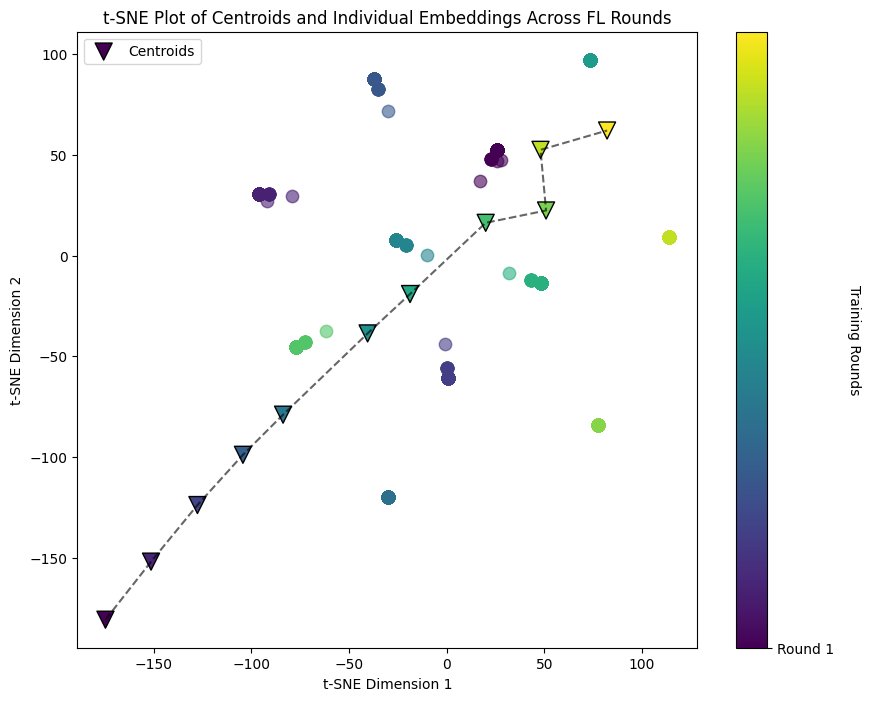

In [10]:
# Number of rounds
rounds = len(data)

# Step 1: Compute centroids (mean of embeddings for each round)
centroids = [np.mean(round_embeddings, axis=0) for round_embeddings in data]

# Convert centroids to a 2D NumPy array
centroids = np.vstack(centroids)

# Step 2: Apply t-SNE to reduce dimensionality to 2D for visualization (on centroids)
tsne = TSNE(n_components=2, random_state=0, perplexity=3)
tsne_result = tsne.fit_transform(centroids)

# Step 3: Apply t-SNE to the individual embeddings for each round
# First, flatten the data into a single array for t-SNE
individual_embeddings = np.vstack(data)  # Combine all rounds' embeddings into a single array

# Apply t-SNE to the individual embeddings
tsne_individual = tsne.fit_transform(individual_embeddings)

# Step 4: Use a "viridis" colormap for better visibility of round progression
cmap = plt.cm.viridis  # "viridis" is a perceptually uniform colormap

# Step 5: Plotting the t-SNE result for centroids and individual embeddings
plt.figure(figsize=(10, 8))

# Plot centroids of each round with triangular markers ('v')
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=range(rounds), cmap=cmap, s=150, edgecolors='black', marker='v', label='Centroids')

# Add line connecting the centroids to show trajectory
plt.plot(tsne_result[:, 0], tsne_result[:, 1], c='black', linestyle='--', alpha=0.6)

# Plot individual embeddings for each round
start_idx = 0
for i in range(rounds):
    end_idx = start_idx + len(data[i])  # Get the end index for the current round's embeddings
    round_embeddings_tsne = tsne_individual[start_idx:end_idx]
    
    # Plot the individual embeddings, semi-transparent
    plt.scatter(round_embeddings_tsne[:, 0], round_embeddings_tsne[:, 1], c=[cmap(i / rounds)], s=80, alpha=0.6)

    # Update start index for the next round's embeddings
    start_idx = end_idx

# Step 6: Add a colorbar to represent the rounds
cbar = plt.colorbar(plt.cm.ScalarMappable(cmap=cmap), ticks=[0, 2, 4, 6, 8, 9])
cbar.set_ticklabels(['Round 1', 'Round 2', 'Round 3', 'Round 4', 'Round 5', 'Round 10'])
cbar.set_label('Training Rounds', rotation=270, labelpad=20)

# Step 7: Label the plot
plt.title("t-SNE Plot of Centroids and Individual Embeddings Across FL Rounds")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")

# Step 8: Display the plot
plt.legend()
plt.show()

### Client missing_aware prompts

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from matplotlib.colors import LinearSegmentedColormap
import os
import torch

In [12]:
data_path = "../output_1211/missing_aware/test"
data = []
for file in os.listdir(data_path):
    file_path = os.path.join(data_path, file)
    round_num = int(file.split("_")[-1].split(".")[0])
    if file.startswith("prompts"):
        data_round = torch.load(file_path)
        print(data_round.shape)
        data_round = data_round.reshape(data_round.shape[0], -1)
        print(data_round.shape, round_num)
        data.append(np.array(data_round))


torch.Size([287, 6, 16, 768])
torch.Size([287, 73728]) 125
torch.Size([287, 6, 16, 768])
torch.Size([287, 73728]) 175
torch.Size([287, 6, 16, 768])
torch.Size([287, 73728]) 225
torch.Size([287, 6, 16, 768])
torch.Size([287, 73728]) 250
torch.Size([287, 6, 16, 768])
torch.Size([287, 73728]) 75
torch.Size([287, 6, 16, 768])
torch.Size([287, 73728]) 2
torch.Size([287, 6, 16, 768])
torch.Size([287, 73728]) 200
torch.Size([287, 6, 16, 768])
torch.Size([287, 73728]) 150
torch.Size([287, 6, 16, 768])
torch.Size([287, 73728]) 25
torch.Size([287, 6, 16, 768])
torch.Size([287, 73728]) 100
torch.Size([287, 6, 16, 768])
torch.Size([287, 73728]) 50


/tmp/ipykernel_1793096/3923241403.py:46: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(plt.cm.ScalarMappable(cmap=cmap), ticks=[0, 2, 4, 6, 8, 9])


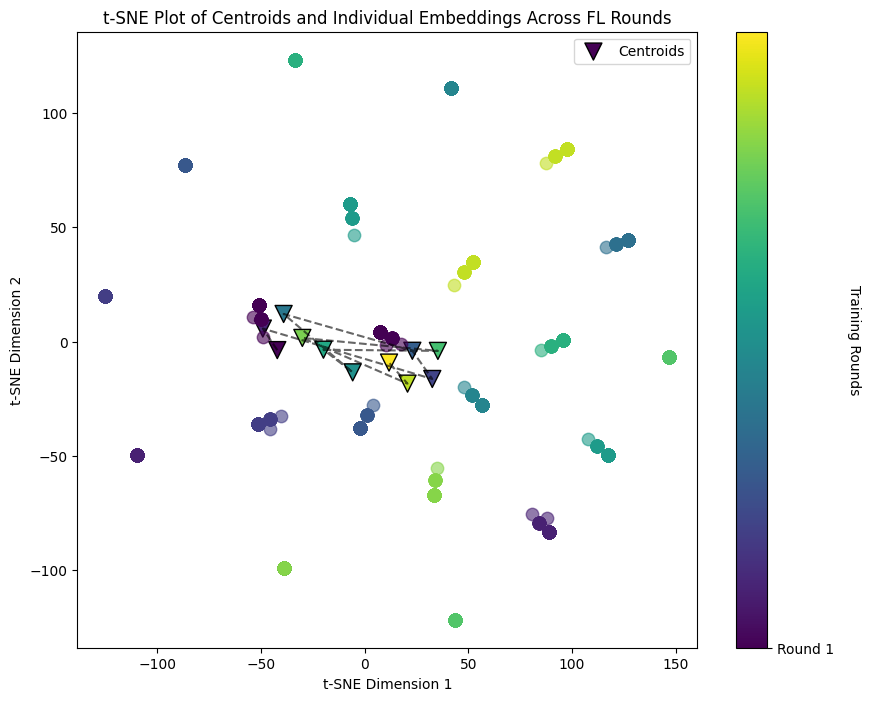

In [13]:
# Number of rounds
rounds = len(data)

# Step 1: Compute centroids (mean of embeddings for each round)
centroids = [np.mean(round_embeddings, axis=0) for round_embeddings in data]

# Convert centroids to a 2D NumPy array
centroids = np.vstack(centroids)

# Step 2: Apply t-SNE to reduce dimensionality to 2D for visualization (on centroids)
tsne = TSNE(n_components=2, random_state=0, perplexity=5)
tsne_result = tsne.fit_transform(centroids)

# Step 3: Apply t-SNE to the individual embeddings for each round
# First, flatten the data into a single array for t-SNE
individual_embeddings = np.vstack(data)  # Combine all rounds' embeddings into a single array

# Apply t-SNE to the individual embeddings
tsne_individual = tsne.fit_transform(individual_embeddings)

# Step 4: Use a "viridis" colormap for better visibility of round progression
cmap = plt.cm.viridis  # "viridis" is a perceptually uniform colormap

# Step 5: Plotting the t-SNE result for centroids and individual embeddings
plt.figure(figsize=(10, 8))

# Plot centroids of each round with triangular markers ('v')
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=range(rounds), cmap=cmap, s=150, edgecolors='black', marker='v', label='Centroids')

# Add line connecting the centroids to show trajectory
plt.plot(tsne_result[:, 0], tsne_result[:, 1], c='black', linestyle='--', alpha=0.6)

# Plot individual embeddings for each round
start_idx = 0
for i in range(rounds):
    end_idx = start_idx + len(data[i])  # Get the end index for the current round's embeddings
    round_embeddings_tsne = tsne_individual[start_idx:end_idx]
    
    # Plot the individual embeddings, semi-transparent
    plt.scatter(round_embeddings_tsne[:, 0], round_embeddings_tsne[:, 1], c=[cmap(i / rounds)], s=80, alpha=0.6)

    # Update start index for the next round's embeddings
    start_idx = end_idx

# Step 6: Add a colorbar to represent the rounds
cbar = plt.colorbar(plt.cm.ScalarMappable(cmap=cmap), ticks=[0, 2, 4, 6, 8, 9])
cbar.set_ticklabels(['Round 1', 'Round 2', 'Round 3', 'Round 4', 'Round 5', 'Round 10'])
cbar.set_label('Training Rounds', rotation=270, labelpad=20)

# Step 7: Label the plot
plt.title("t-SNE Plot of Centroids and Individual Embeddings Across FL Rounds")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")

# Step 8: Display the plot
plt.legend()
plt.show()